### 一.算法推导
Gibbs算法其实就是单分量MH算法中，建议分布取满条件概率分布的特殊情况，即：    

$$
q(x_j^{(i-1)}\rightarrow x_j^{'(i)} \mid x_{-j}^{(i)})=p(x_j^{'(i)} \mid x_{-j}^{(i)})
$$   

那自然的，我们接下来还会关心接收概率$\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})$的情况：   

$$
\alpha(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})q(x_j^{'(i)}\rightarrow x_j^{(i-1)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})q(x_j^{(i-1)}\rightarrow x_j^{'(i)}\mid x_{-j}^{(i)})}\}=min\{1,\frac{p(x_j^{'(i)}\mid x_{-j}^{(i)})p(x_j^{(i-1)}\mid x_{-j}^{(i)})}{p(x_j^{(i-1)}\mid x_{-j}^{(i)})p(x_j^{'(i)}\mid x_{-j}^{(i)})}\}=min\{1,1\}=1
$$  

接受率竟然始终为1，始终不会拒绝样本！所以Gibbs采样是一种特别高效的方法，下面直接说下采样流程

###  二.Gibbs采样流程
输入：目标概率分布的密度函数$p(x)$，正整数$m,n,m<n$；   
输出：$p(x)$的随机样本$x_{m+1},x_{m+2},...,x_n$

>（1）初始化样本$x^{(0)}=(x_1^{(0)},x_2^{(0)},...,x_k^{(0)})$   

>（2）对$i=1,2,...,m,m+1,...n$：   

>>对$j=1,2,...,k$：   

>>>根据建议分布$p(x_j\mid x_{-j}^{(i)})$抽样第$j$维数据$x_j^{'(i)}$，并令$x_j^{(i)}=x_j^{'(i)}$   
  

>（3）返回样本集$\{x_{m+1},x_{m+2},...,x_n\}$  

### 三.案例
例子就用前一节的，直观感受一下与单分量MH的不同...公式部分就不码了...

In [1]:
import os
os.chdir('../')
from ml_models import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义均值，协方差
u=np.asarray([0,0])
sigma=np.asarray([[1,0.5],
                  [0.5,1]])

In [3]:
import copy
#采样的样本量
nums=1000
count=0
points=[]
#采样x0
point=[np.random.randn(),np.random.randn()]
points.append(point)
while count<nums:
    new_point=copy.deepcopy(point)
    for k in (0,1):
        # 按照满条件概率分布采样
        new_point[k]=(np.random.randn()+0.5*new_point[(k+1)%2])*0.75
    point=new_point
    points.append(point)
    count+=1

D:\app\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


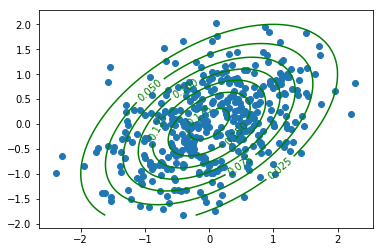

In [4]:
utils.plot_contourf(np.asarray(points[-400:]),lambda x:utils.gaussian_nd(x,u,sigma),8)

### 四.小结
对比一下Gibbs采样和单分量MH直接的异同点：   

先说相同的地方：（1）两者都是要在满条件分布可用的前提下才能使用； （2）Gibbs采样是单分量MH的特殊情况，即建议分布取满条件概率分布的情况；    

再说不同的地方：（1）满条件概率分布好采样时用Gibbs，不好采用时用单分量MH；（2）单分量MH有拒绝抽样的情况，而Gibbs采样全部接受   

下面再补充一副关系图对抽样这一章的内容做总结   


![avatar](./source/12_MCMC总结.png)